<b>Lab #17 (Evaluated)


Submission deadline: Friday 13th January

Peergrading deadline: Wed. 18th January</b>

 <b>Don't forget to fill the table in the end of the Lab and use sizeof </b>

<b>Have to ask for suggestions or resources  </b>

<b>Have to watch the video for the bloom filter session  </b>

# questions and doubts and some general points

In [1]:
# 1 - how shoul we answer the theory parts? should we adress them in the report or should we code them? 
# like fingerprits set question 2 and 4
# Q:what is the formula we should use for the analytical part?
#A: explained in the layers parts 
#when will he upload the video of the first session?
#A: He will upoload it but idk when
# by simulation: obvious, Analytically = formulas(maybe), theory?
# theory and analytically are the same 
#Slide 08/ page 16 is important (it’s what we have to keep in mind)
#It’s useful for set of fingerprints question 2 
# we should watch the video fro this session to be able to run the simulation (19th of December, session one)
# page 28 and 29 are important for the bloom filter 
# formula is page 28 gives us a real number and we have to either use 12 or 13, we have to choose the optimal value
# since bloom filters do not work with real numbers 
# for bloom filters, question 1 and two are different but somehow related
#the formula in page 29 is important but only the first part = (1-P) ** K (only this part is important)
#fingerprints set : Done (except for one or two parts)
#bit string array : 1 : done, the rest is just some theory 
#bloom filters : Not Done
# bloom filters question : how do we make different hash funcitons? ok as far as I know , page 27, slide 12 would help(would clear things)
# page 30 slide 12 = optimal number of hash functions for bloom filters
# page 31 slide 12 = probablity of false positive if we have the optimal k 
# prbability of false positive increases as the valye of n/m increases n = memory slots and m = len(verses_set) :)
# page 32 = a formula for epsilon and stuff (useful)
# question = the table in the end, is it for what we've found through simulation?
# page 16 in slide 08 is important 
# I have to read the bloom filters pdf and also watch video for the firsrsession of 19th of December 

In [2]:
########################################################################

<b>Have to use the efficient and non efficient mode in the report </b>

# Description

<img src="./17-1.png" alt="Alternative text" />

<img src="./17-2.png" alt="Alternative text" />

<img src="./17-3.png" alt="Alternative text" />

In [37]:
# this table, seems weird, like how should we fill it?

# Pre-processing 

In [3]:
import hashlib
import re
from pympler import asizeof
import math
import matplotlib.pyplot as plt
import numpy as np
from bitarray import bitarray

In [4]:
#############################################33
file = open("commedia.txt", "rt")
data = file.read()

In [5]:
#===========================
data=re.sub(r"[^\w\d'\s]+",'',data) # deleting the punctuations
words = data.split('\n')
del words[0:8]
clean_words=[]
for line in words.copy():
    if line.startswith("Inferno") or line.startswith("Purgatorio") or line.startswith("Paradiso")or not line.strip():
        words.remove(line) # deleting the headers 
    else:
        line = line.strip()
        splited_words = line.split(" ")
        clean_words.extend(splited_words)
print('the total number of words is \n')
print(len(clean_words)) #counting the number of words 
##############################################

the total number of words is 

96929


In [6]:
asizeof.asizeof(clean_words)
#it's in bytes

6055040

In [7]:
print(f'number of distinct words is equal to {len(set(clean_words))}')

number of distinct words is equal to 14642


In [8]:
plagiarism_size= 6 #window size 
verses = []
finger_prints=[]
verse_count=0



for i in range (len(clean_words)):
    if len(clean_words[i:i+plagiarism_size])==plagiarism_size:
        verses.append(' '.join(clean_words[i:i+plagiarism_size]))

verses_set=set(verses)    
m = len(verses_set)
epsilon = 10 ** -5
b = math.ceil(math.log((m/epsilon) , 2 )) # b has to larger or equal to this value 
n = 2 ** b


for i in verses_set:
    temp=i
    encoded=temp.encode('utf-8')
    hashed=hashlib.md5(encoded)
    int_hashed=int(hashed.hexdigest(), 16)
    h = int_hashed % n
    finger_prints.append(h)


        
        
#we should store the fingerprints in a hashtable 
#then we should computer and store the finger prints inside of a hashtable 
print(f'\ntotal number of verses is {len(verses)} \n')
print(f'\ntotal number of verses(set) is {len(verses_set)} \n')



total number of verses is 96924 


total number of verses(set) is 96828 



In [9]:
len(finger_prints) #we give the fingerprints the set version of verses

96828

In [10]:
b

34

In [11]:
finger_prints_set=set(finger_prints)
# len(finger_prints_set)

<b>we check the length of finger prints and the length of the set of finger prints and if there's any difference, it means that<br>
there's a collision<br>
we check the fingerprints since it's the fingerprints that help us find plagiarism <br> 

</b>

In [12]:
print (f'the number of collisions are {len(finger_prints)-len(finger_prints_set)}')

the number of collisions are 0


In [13]:
#it's better to have both fingerprints and the verses stored in a dictionary 
# so we're gonna do it from the beginning
new_verses=[]
# m = len(verses) 
# we already have the value for m , b , epsilon and n since we've ran the code before
# epsilon = 10 ** -4
# b = math.log((m/epsilon) , 2 ) # b has to larger or equal to this value 
# n = m * b
general_dict={}

for i in range (len(clean_words)):
    if len(clean_words[i:i+plagiarism_size])==plagiarism_size:
        new_verses.append(' '.join(clean_words[i:i+plagiarism_size]))
        temp=new_verses[i]
        encoded=temp.encode('utf-8')
        hashed=hashlib.md5(encoded)
        int_hashed=int(hashed.hexdigest(), 16)
        h = int_hashed % n
        finger_prints.append(h)
        if h in general_dict.keys():
            general_dict[h] + " , " + temp
        else:
            temp_dict={h:temp}
            general_dict.update(temp_dict)

# Fingerprint set:

# 1-

In [14]:
# for lab 17 the fingerprints part we have to chagne the epsilon between 10 ** -5 and 10 ** -6 to find the minimum number of bits  

In [15]:
r=np.linspace(0.0001,0.000001,1000).tolist()

In [16]:
# r

In [17]:
# in this section we try to find the right value for b and the right value for epsilon 
plagiarism_size= 6 #window size 
verses = []
verse_count=0



for i in range (len(clean_words)):
    if len(clean_words[i:i+plagiarism_size])==plagiarism_size:
        verses.append(' '.join(clean_words[i:i+plagiarism_size]))

verses_set=set(verses)    
m = len(verses_set)
for j in range(10, 0, -1):
    epsilon = j * (10 ** -5)
    b = math.ceil(math.log((m/epsilon) , 2 )) # b has to larger or equal to this value 
    n = 2 ** b
    finger_prints=[]
    for i in verses_set:
        temp=i
        encoded=temp.encode('utf-8')
        hashed=hashlib.md5(encoded)
        int_hashed=int(hashed.hexdigest(), 16)
        h = int_hashed % n
        finger_prints.append(h)

    finger_prints_set=set(finger_prints)
    if (len(finger_prints)-len(finger_prints_set) == 0):
        print (f'the value for epsilon is equal to  {epsilon} and the value of b is equal to {b}\n')


the value for epsilon is equal to  1e-05 and the value of b is equal to 34



In [18]:
#min bit = 33 and epsilon = 2e-05
# have to find the min value for collisioin and the value for it's b 

In [19]:
# a collision happens when 2 items have the same hash value

In [20]:
# the fingerprints part is over since the other stuff are theoratical  and we have the answers 
#2 and 4 are avilabe in a picture 
#for number 3 , we have to do what we've done for number 1 but reverse like we have to go through different values of b 
# and compute the epsilon

so Bexp = 34 (what I've found) but 33 would also work

The picture below works for question 2 and 3

<img src="./17-fingerprint-2&3.jpg" alt="Alternative text" />

# 2-

Bteo ====> m = 1.17* sqrt(n) =>(m/1.17) ** 2 = 2 ** b => b = log((m/1.17 ** 2), base =2 ) = 33 (if we round it up to 1)

In [21]:
temp =(m/1.17) ** 2
bteo = math.log(temp,2)
print(round(bteo))

33


# 3- (Have to double check this one)

In [22]:
# Question
# I just have to find Epsilon with the value of Bexp?
# if yes, the the cell below has the answer
# is it the formula in page 13 or 14 or 15?

<b>The cell below is based on formula in the page 14/15 of slide 12</b>

In [23]:
# epsilon = m / 2 ** b
m = len(verses_set)
bexp= 34 # found in question 1
new_epsilon = m/(2** bexp)
print(new_epsilon)

5.636131390929222e-06


<b>The above cell seems wrong </b>

<b>let's try the one in page 13 </b>

In [24]:
#Pr(False positive) = 1-(1-1/n) ** m
pr= 1- ((1-(1/(2**bexp))) ** m)
print(pr)

5.636115508189654e-06


LOL it gives  the same value</br>
but it seems wrong </br>
really wrong </br>

# 4- (Better be double checked)<br>
<b> Yes. </b>

# Bit string array:

In [25]:
# question 1 has to be done through simulation so it needs coding 
# 2 , 3, 4 don't need coding 

# 1-

In [26]:
# page 21 slide 12 I think it's used for question one  of bit string array 
# I think we can use the second scenario

In [27]:
# creating a bit array of zeros and gonna make turn every index of the occurance to one 

In [28]:
m = len(verses_set) 
bits= [i for i in range(19,24)]
# n= [2**i for i in b]
# n = m = 2 ** b
General_dict={}
for b in bits:
    a=bitarray(2**b)
    a.setall(0)
    n=2**b
    FP_count = 0
    for i in verses_set:
        temp=i
        encoded=temp.encode('utf-8')
        hashed=hashlib.md5(encoded)
        int_hashed=int(hashed.hexdigest(), 16)
        h = int_hashed % n
        if a[h]==0:
            a[h]=1
        elif a[h]==1:
            FP_count+=1 # it actually checks the number of collisions 
    #General_dict[n] = FP_count # this will give you the collisions and if you divide it by m then you have the FP
    General_dict[n] = FP_count/m

In [29]:
General_dict

{524288: 0.08555376543974884,
 1048576: 0.04416077993968687,
 2097152: 0.022132027925806586,
 4194304: 0.010843970752261742,
 8388608: 0.00536001982897509}

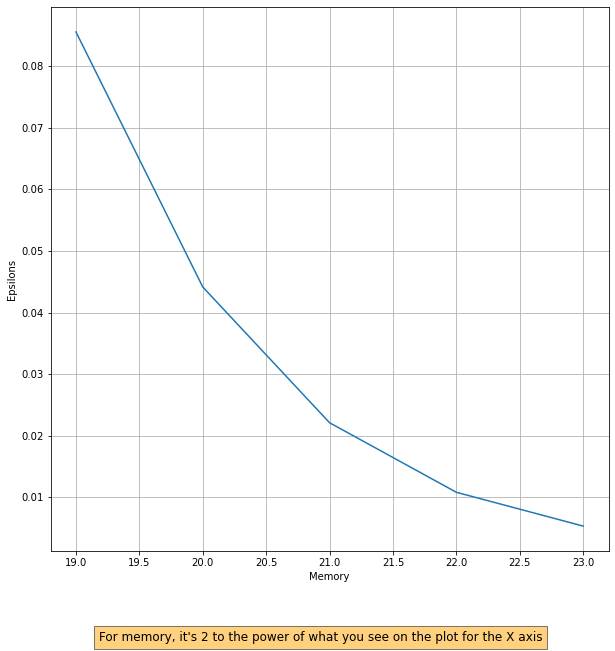

In [43]:
plt.figure(figsize=(10,10))
plt.plot([i for i in range(19,24)],General_dict.values())
plt.xlabel('Memory')
plt.ylabel('Epsilons')
plt.figtext(0.5, 0, "For memory, it's 2 to the power of what you see on the plot for the X axis", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.grid()
plt.show()


In [31]:
# as the memory increases, the value for False positive decreases 

In [32]:
#all these stuff I did were for the first one 
# now I have to find the other ones 

# 2-

In [36]:
# question = should I implement bitarray for this question as well

n = m/epsilon <br>
b = log( m/epsilon ,base = 2) <br>
n = 2 ** b = m / epsilon bits  <br>
based on above  <br>
epsilon = m / 2 ** b

In [33]:
m = len(verses_set) 
b = [i for i in range(19,24)]
n= [2**i for i in b] 
# now based on the value of b and n we have to find different values for epsilon
epsilons = []
for i in n:
    epsilons.append(m/i)

In [34]:
epsilons

[0.18468475341796875,
 0.09234237670898438,
 0.04617118835449219,
 0.023085594177246094,
 0.011542797088623047]

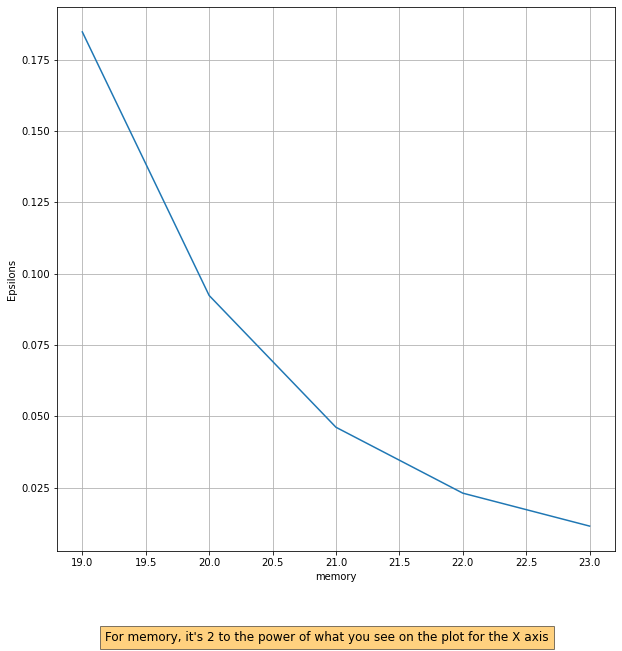

In [42]:
plt.figure(figsize=(10,10))
plt.plot([i for i in range(19,24)],epsilons)
plt.xlabel('memory')
plt.ylabel('Epsilons')
plt.figtext(0.5, 0, "For memory, it's 2 to the power of what you see on the plot for the X axis", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.grid()
plt.show()
#based on theory

# 3-(have to double check this one)

In [40]:
# how should I compare it? 
# should I write it in the report? or should I use it in the code? 
# should I just write a sentence for this question?
# should I plot it?

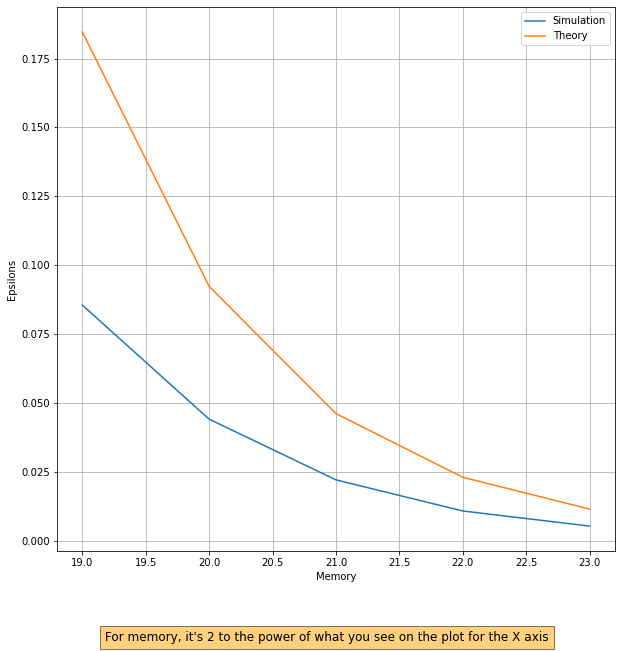

In [41]:
plt.figure(figsize=(10,10))
plt.plot([i for i in range(19,24)],General_dict.values(), label = 'Simulation')
plt.plot([i for i in range(19,24)],epsilons,label='Theory')
plt.xlabel('Memory')
plt.ylabel('Epsilons')
plt.figtext(0.5, 0, "For memory, it's 2 to the power of what you see on the plot for the X axis", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.grid()
plt.legend()
plt.show()

<b>As you can see in the plots, these results follow the same pattern and behaviour </b>

# 4- (have to ask about this question) <br>
I don't undrestand this question <br>
In which sense should we compare it to Bexp?

I have the same doubts for this question as the ones I had for the third one 

In [ ]:
# how should I compare it? 
# should I write it in the report? or should I use it in the code? 
# should I just write a sentence for this question?
# should I plot it?

# Bloom Filters 

In [45]:
# should we implemet it or can we just use the pip library?

https://pypi.org/project/bloom-filter/

# 1-

In [ ]:
# how should we find the opimum number of hash functions? 
# what should we iterate over?
# by analytically it means that we only have to use the formula? if yes, then which formula is it?


# 2-

In [ ]:
# we have to use the optimal hash number and use the thoery to find the probability of false positive.
# which formula should we use?